Data Exploration

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [29]:
#carregando o dataset 
df = pd.read_csv('E:/00_Bootcamp_Infnet/06_Final_Project_INFNET/customer-segmentation-dataset/Mall_Customers.csv') 

In [30]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [31]:
df.drop('CustomerID', axis = 1, inplace = True) # dropando costumer ID

In [32]:
df = df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'}) #renomando as colunas 

In [33]:
df.columns = df.columns.str.lower()

In [34]:
df.head()

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [35]:
#info verificando se existem dados faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


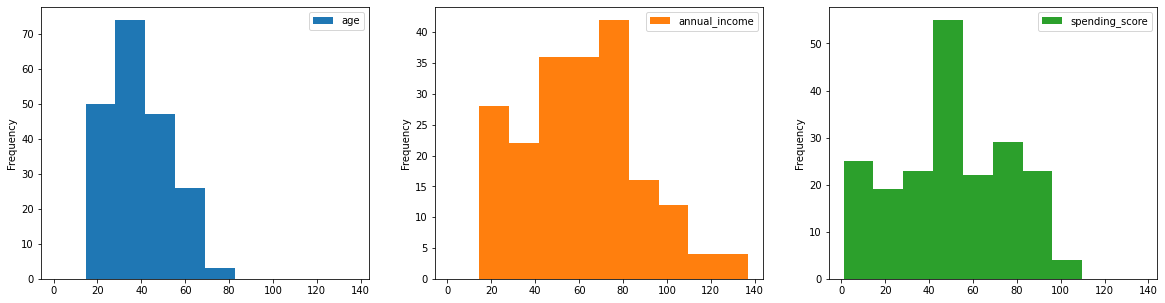

In [36]:
#Histograma dos dados 
fig,ax = plt.subplots(1,3,figsize=(20,5))
df.plot(kind='hist',ax=ax, subplots=True, bins=10)
plt.show()

In [37]:
df.groupby("gender").age.agg('count')


gender
Female    112
Male       88
Name: age, dtype: int64

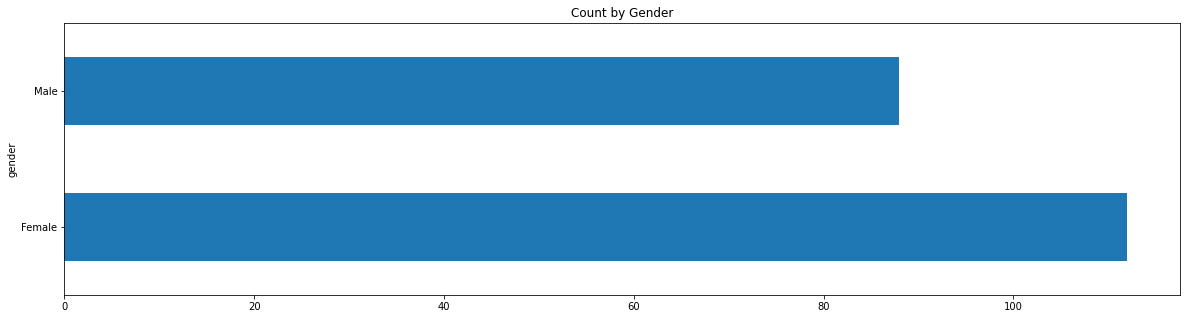

In [39]:
fig,ax=plt.subplots(1,1,figsize=(20,5))
df.groupby("gender").age.agg('count').plot(kind='barh',ax=ax).set_title('Count by Gender')
plt.show()

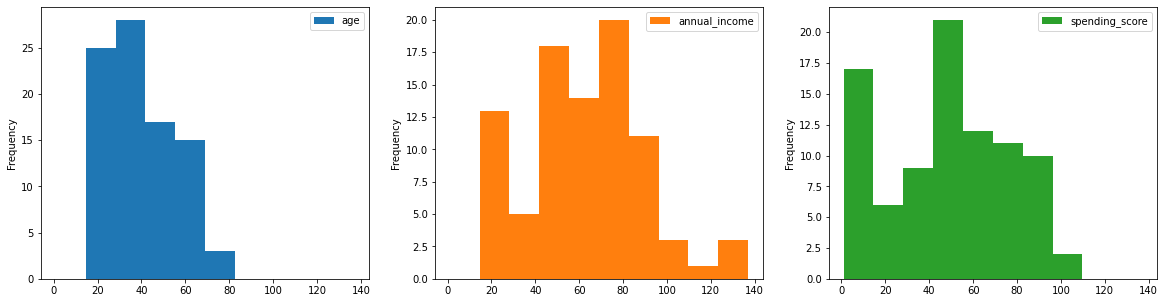

In [41]:
#Histograma_Homens 
fig,ax = plt.subplots(1,3,figsize=(20, 5))
sdf = df.groupby(by='gender')
sdf.get_group("Male").plot(kind='hist',ax=ax, subplots=True, bins=10)
plt.show()

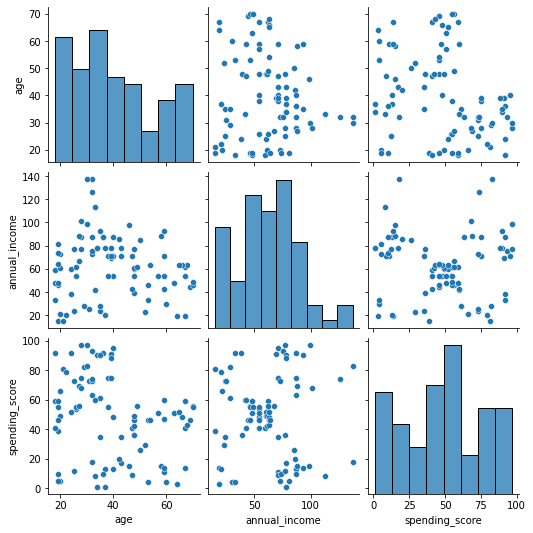

In [42]:
sns.pairplot(sdf.get_group("Male"))
plt.show()

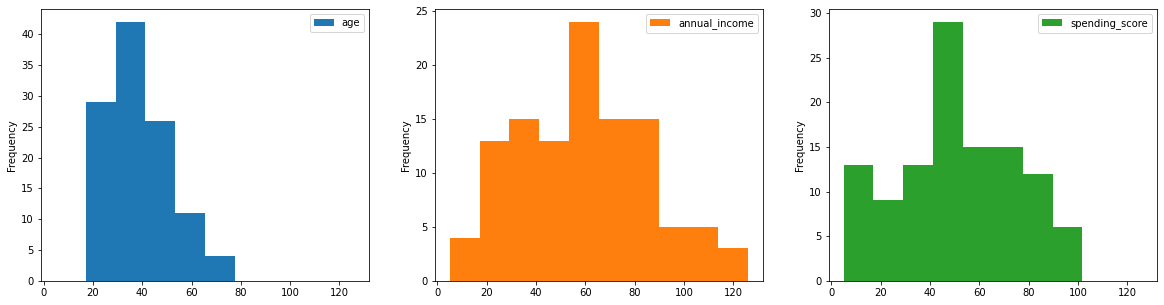

In [43]:
#histograma_Mulheres
fig,ax = plt.subplots(1,3,figsize=(20, 5))
sdf2 = df.groupby(by='gender')
sdf2.get_group("Female").plot(kind='hist',ax=ax, subplots=True, bins=10)
plt.show()

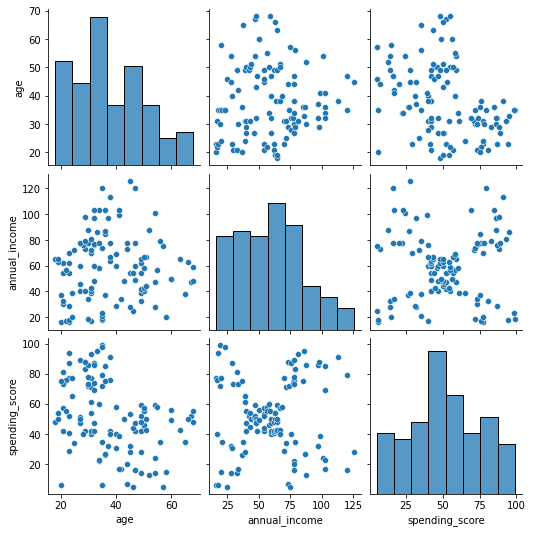

In [44]:
sns.pairplot(sdf.get_group("Female"))
plt.show()

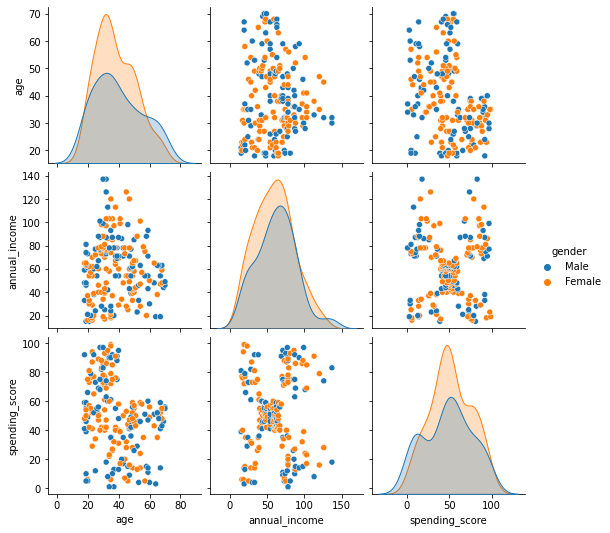

In [46]:
sns.pairplot(df ,hue="gender")
plt.show()

In [50]:
df1=pd.get_dummies(df, drop_first=True) 
#tranformando os generos em 0 e 1(drop first dropa a primera colula do dummie) 0 Mulher e 1 Homem
df1

,age,annual_income,spending_score,gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [53]:
df1 = df1.rename(columns={'gender_Male':'gender'}) 
df1.head(1)

,age,annual_income,spending_score,gender
0,19,15,39,1


In [55]:
df_age_income= df1[['age','annual_income']] 
df_age_spending= df1[['age','spending_score']] 
df_age_gender= df1[['age','gender']] 
df_score_income= df1[['spending_score','annual_income']] 
df_gender_score= df1[['gender','spending_score']]
df_gender_income= df1[['gender','annual_income']]

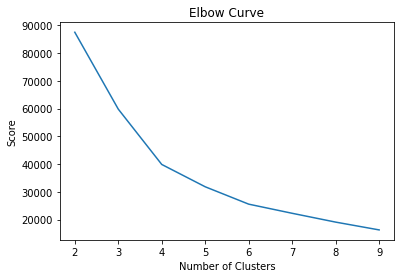

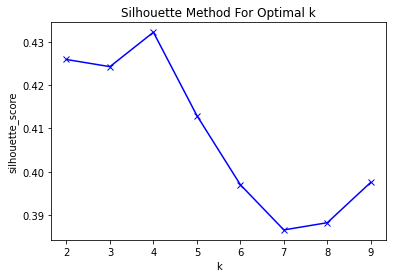

N_cluster: 2, score: 0.425953292753904
N_cluster: 3, score: 0.425111491552797
N_cluster: 4, score: 0.43208935577498
N_cluster: 5, score: 0.40380272213818524
N_cluster: 6, score: 0.396776517237133
N_cluster: 7, score: 0.38837755732878665
N_cluster: 8, score: 0.39362062036006606
N_cluster: 9, score: 0.3896155856619788


In [177]:
K_clusters = range(2,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df_age_income[['age']]
X_axis = df_age_income[['annual_income']]
score = [kmeans[i].fit(df_age_income).inertia_ for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


sil = []
K_sil = range(2,10)
for k in K_sil:
    kmeans = KMeans(n_clusters = k).fit(df_age_income)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_age_income, labels, metric = 'euclidean')) 

#Visualization
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()


for i in range(2,10):
  kmeans_ = KMeans(n_clusters=i).fit(df_age_income)
  labels_ = kmeans_.labels_
  coef = silhouette_score(df_age_income,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

In [224]:
Y= np.array(df_age_income)
kmeans = KMeans(n_clusters=5, random_state=1).fit(Y)
kmeans.labels_
df_age_income['clusterlabels'] = kmeans.labels_

In [225]:
df_age_income.head(10)

,age,annual_income,clusterlabels
0,19,15,1
1,21,15,1
2,20,16,1
3,23,16,1
4,31,17,1
5,22,17,1
6,35,18,1
7,23,18,1
8,64,19,3
9,30,19,1


In [227]:
print(kmeans.cluster_centers_)

[[3.76964286e+01 7.85178571e+01 1.99840144e-15]
 [3.02142857e+01 2.70714286e+01 1.02380952e+00]
 [2.50645161e+01 5.94838710e+01 3.00000000e+00]
 [5.64901961e+01 4.98039216e+01 1.92156863e+00]
 [3.66000000e+01 1.09700000e+02 4.00000000e+00]]


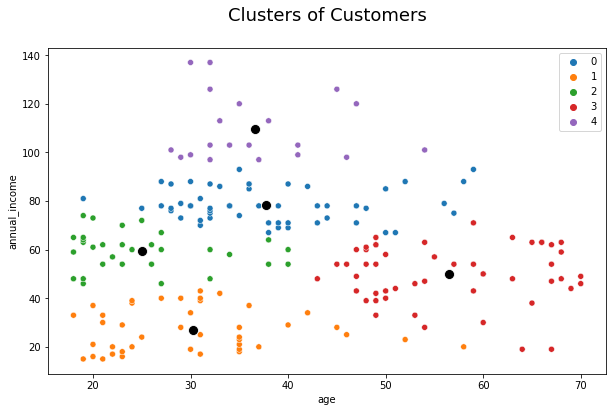

In [226]:
clusterlabels = df_age_income['clusterlabels']
plt.figure(figsize=(10, 6))
sns.scatterplot(df_age_income['age'], df_age_income['annual_income'],hue=clusterlabels,palette=sns.color_palette("tab10",5))
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', s = 100)
plt.title('Clusters of Customers\n', fontsize = 18)
plt.show()

Análise 01 - Pessoas com idades entre 30 e 60 possuem renda anual acima 90k confrome indicado no cluster 4 
No cluster 0 e 3 

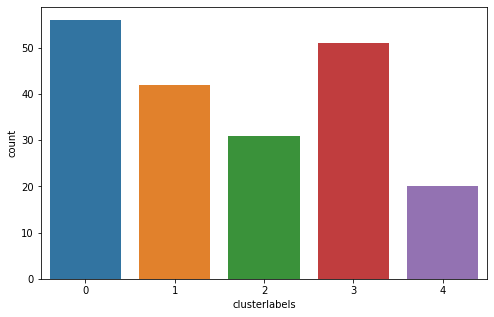

In [228]:
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_age_income,x='clusterlabels')

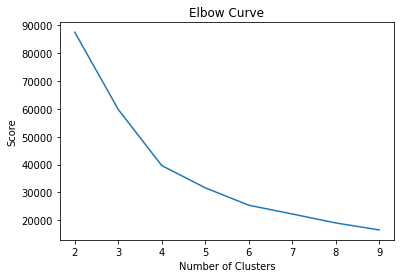

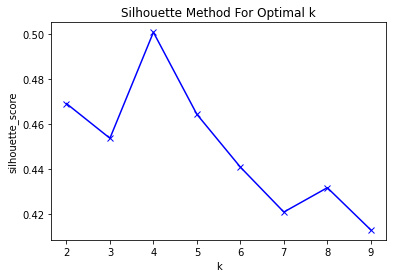

N_cluster: 2, score: 0.46906424627512594
N_cluster: 3, score: 0.4536608321882585
N_cluster: 4, score: 0.5007079483904984
N_cluster: 5, score: 0.4645912842152287
N_cluster: 6, score: 0.44701550120740374
N_cluster: 7, score: 0.4227554745988417
N_cluster: 8, score: 0.4337467565444789
N_cluster: 9, score: 0.4146943636726743


In [229]:
K_clusters = range(2,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df_age_spending[['age']]
X_axis = df_age_spending[['spending_score']]
score = [kmeans[i].fit(df_age_income).inertia_ for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


sil = []
K_sil = range(2,10)
for k in K_sil:
    kmeans = KMeans(n_clusters = k).fit(df_age_spending)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_age_spending, labels, metric = 'euclidean')) 

#Visualization
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()


for i in range(2,10):
  kmeans_ = KMeans(n_clusters=i).fit(df_age_spending)
  labels_ = kmeans_.labels_
  coef = silhouette_score(df_age_spending,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

In [248]:
Y= np.array(df_age_spending)
kmeans = KMeans(n_clusters=4, random_state=1).fit(Y)
kmeans.labels_
df_age_spending['clusterlabels'] = kmeans.labels_

In [249]:
df_age_spending.head(10)

,age,spending_score,clusterlabels
0,19,39,2
1,21,81,0
2,20,6,1
3,23,77,0
4,31,40,2
5,22,76,0
6,35,6,1
7,23,94,0
8,64,3,1
9,30,72,0


In [250]:
print(kmeans.cluster_centers_)

[[ 3.01754386e+01  8.23508772e+01 -1.33226763e-15]
 [ 4.32916667e+01  1.50208333e+01  1.00000000e+00]
 [ 2.76170213e+01  4.91489362e+01  2.00000000e+00]
 [ 5.57083333e+01  4.82291667e+01  3.00000000e+00]]


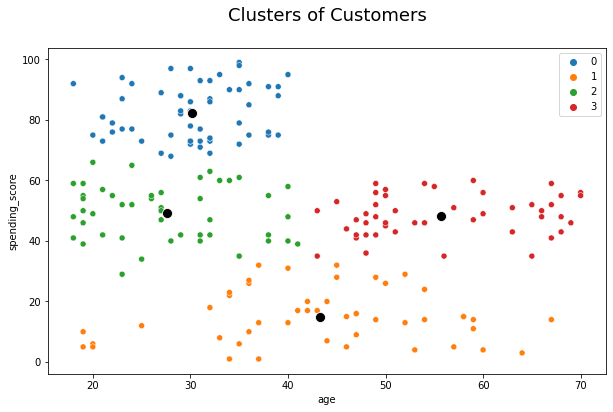

In [251]:
clusterlabels = df_age_spending['clusterlabels']
plt.figure(figsize=(10, 6))
sns.scatterplot(df_age_spending['age'], df_age_spending['spending_score'],hue=clusterlabels,palette=sns.color_palette("tab10",4))
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', s = 100)
plt.title('Clusters of Customers\n', fontsize = 18)
plt.show()

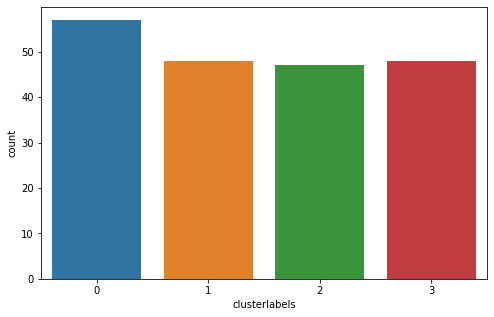

In [252]:
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_age_spending,x='clusterlabels')

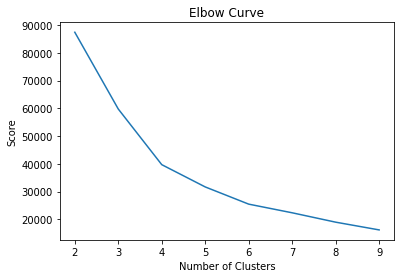

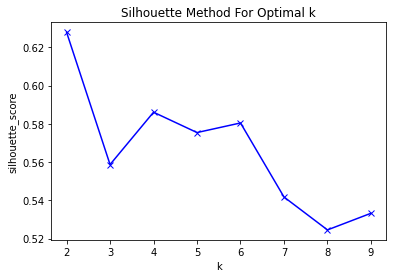

N_cluster: 2, score: 0.627852420220215
N_cluster: 3, score: 0.5387752306105614
N_cluster: 4, score: 0.5860388522448399
N_cluster: 5, score: 0.5754052874598419
N_cluster: 6, score: 0.5783803439870914
N_cluster: 7, score: 0.5411769561498437
N_cluster: 8, score: 0.5377488098168782
N_cluster: 9, score: 0.51591904869584


In [253]:
K_clusters = range(2,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df_age_gender[['age']]
X_axis = df_age_gender[['gender']]
score = [kmeans[i].fit(df_age_income).inertia_ for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


sil = []
K_sil = range(2,10)
for k in K_sil:
    kmeans = KMeans(n_clusters = k).fit(df_age_gender)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_age_gender, labels, metric = 'euclidean')) 

#Visualization
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()


for i in range(2,10):
  kmeans_ = KMeans(n_clusters=i).fit(df_age_gender)
  labels_ = kmeans_.labels_
  coef = silhouette_score(df_age_gender,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

In [263]:
Z = np.array(df_age_gender)
kmeans = KMeans(n_clusters=4, random_state=1).fit(Z)
kmeans.labels_
df_age_gender['clusterlabels'] = kmeans.labels_

In [264]:
print(kmeans.cluster_centers_)

[[ 3.42297297e+01  3.78378378e-01  2.22044605e-16]
 [ 2.26000000e+01  5.00000000e-01 -1.66533454e-16]
 [ 6.32758621e+01  6.20689655e-01  1.00000000e+00]
 [ 4.83404255e+01  3.61702128e-01  1.00000000e+00]]


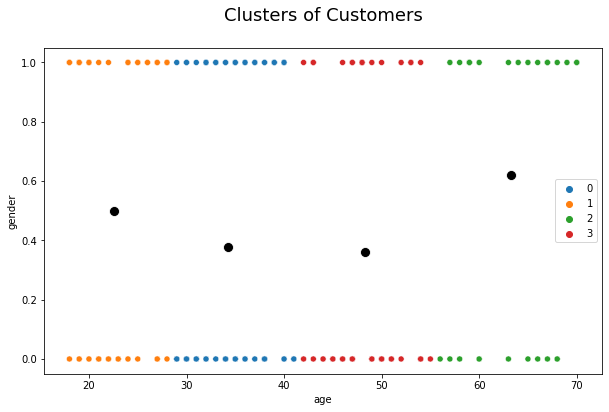

In [265]:
clusterlabels = df_age_gender['clusterlabels']
plt.figure(figsize=(10, 6))
sns.scatterplot(df_age_gender['age'], df_age_gender['gender'],hue=clusterlabels,palette=sns.color_palette("tab10",4))
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', s = 100)
plt.title('Clusters of Customers\n', fontsize = 18)
plt.show()